# Trabajo práctico N°2 - Regresión

### Ignacio Chaves, Legajo: 61.220

# Análisis exploratorio de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as ms
import statsmodels.api as sm

In [234]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [236]:
df = df.drop(columns=['sex', 'smoker', 'region'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [237]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [238]:
from scipy import stats

for column in df:
    stat, p_value = stats.shapiro(df[column])
    print(f'Variable: {column} | Estadístico: {stat} | p-value: {p_value}')
    if p_value > 0.05:
        print(f'La variable {column} sigue una distribución normal\n')
    else:
        print(f'La variable {column} no sigue una distribución normal\n')


Variable: age | Estadístico: 0.9447009637825445 | p-value: 5.69204692845418e-22
La variable age no sigue una distribución normal

Variable: bmi | Estadístico: 0.9938864621676107 | p-value: 2.60468368798344e-05
La variable bmi no sigue una distribución normal

Variable: children | Estadístico: 0.823180467362945 | p-value: 5.066436570900864e-36
La variable children no sigue una distribución normal

Variable: charges | Estadístico: 0.8146881157362383 | p-value: 1.1505226334932036e-36
La variable charges no sigue una distribución normal



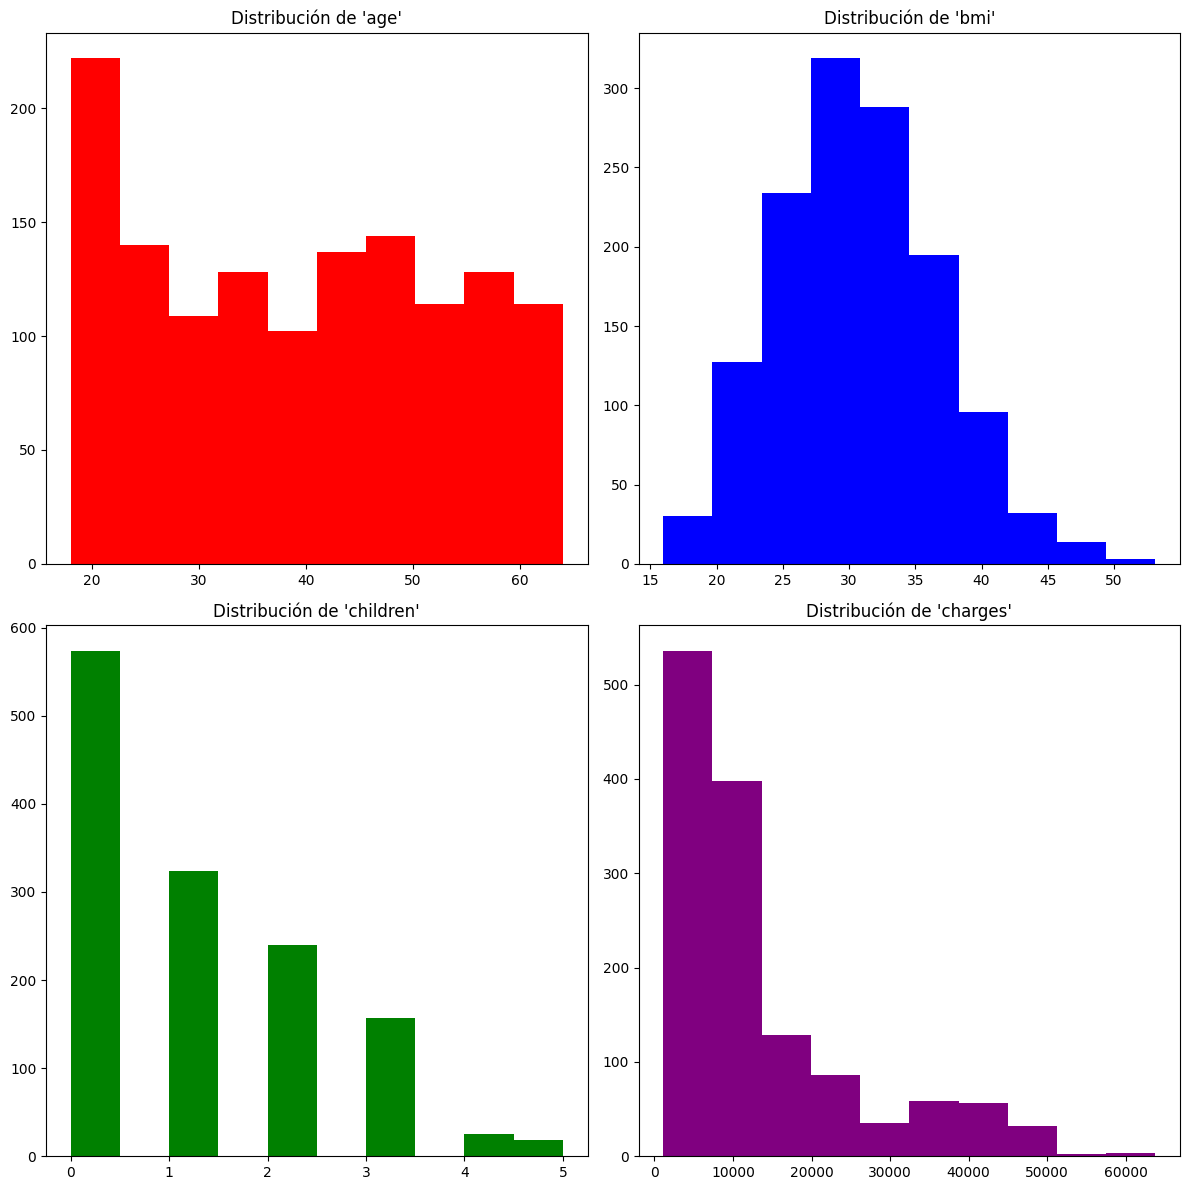

In [239]:
colors = ('red', 'blue', 'green', 'purple')
columns = df.columns[:4]
plt.figure(figsize=(12, 12))
for counter, column in enumerate(columns):
    plt.subplot(2,2,counter+1)
    plt.hist(df[column],color=colors[counter],density=False)
    plt.title(f"Distribución de '{column}'")
plt.tight_layout()
plt.show()

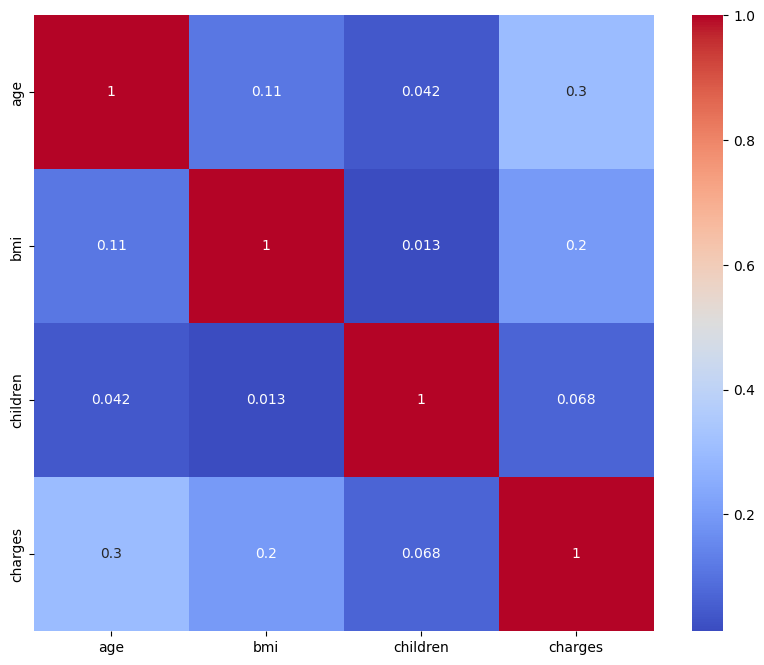

In [240]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

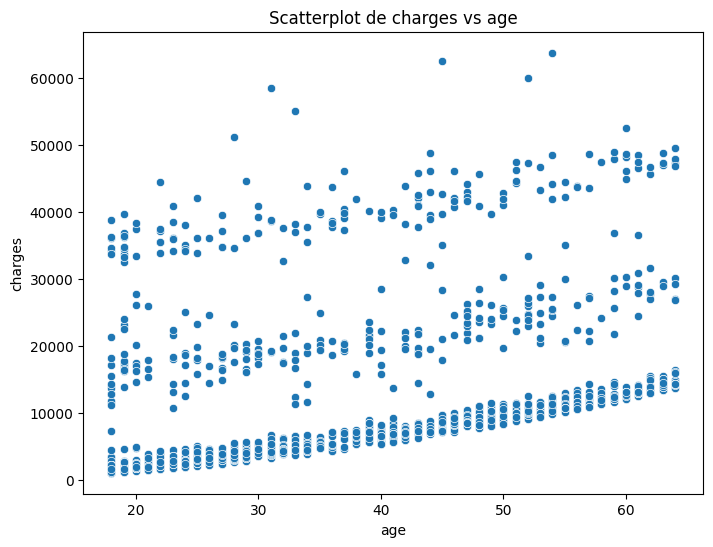

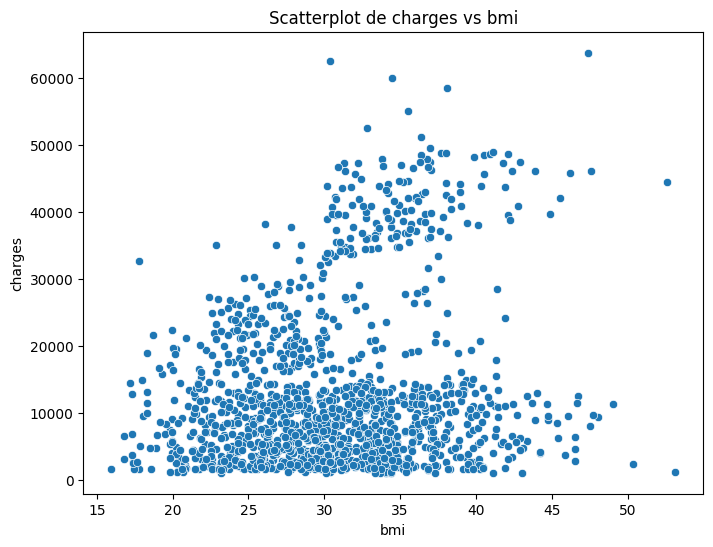

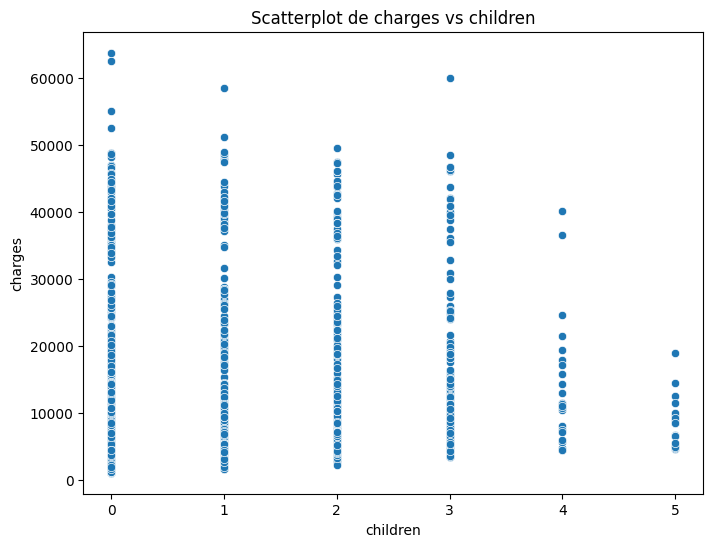

In [241]:
x_columns = df.drop(columns=['charges']).columns

# Crear scatterplots
for column in x_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[column], y=df['charges'])
    plt.title(f'Scatterplot de charges vs {column}')
    plt.xlabel(column)
    plt.ylabel('charges')
plt.show()

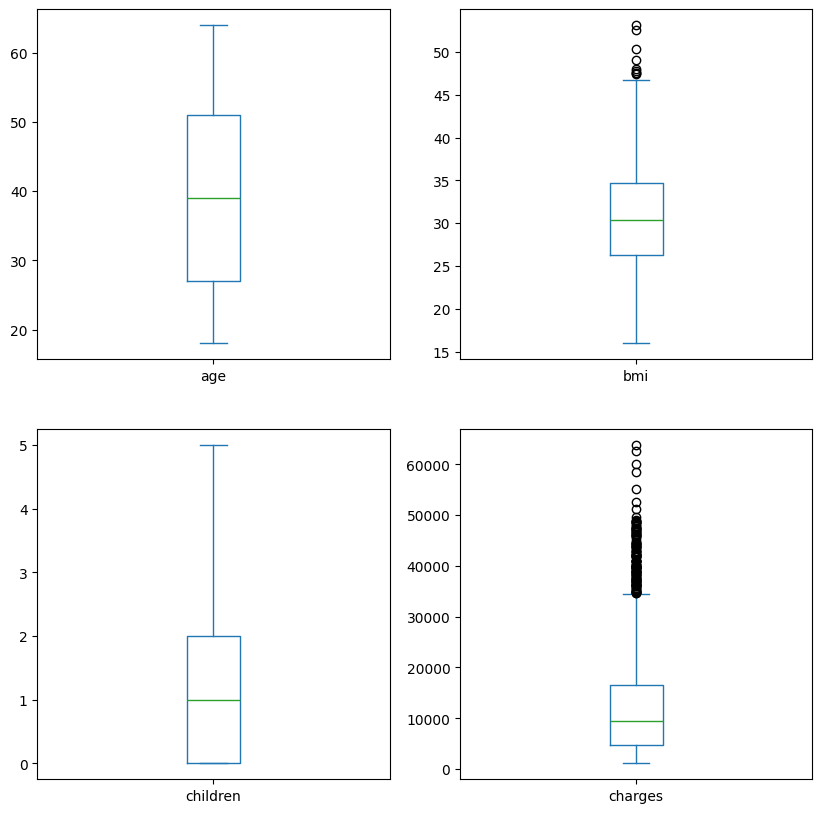

In [242]:
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
plt.show()

# Modelo de Regresión Lineal

En base a lo observado en el análisis exploratorio, la correlación entre las variables independientes y "charges" es muy baja. Igualmente intentaré entrenar tres modelos, uno en base a "age", otro con "bmi" y por último, uno multivariante combinando ambas variables. En base a las métricas obtenidas de cada modelo, evaluare cual es el más indicado.

In [243]:
X = df[["age", "bmi"]].to_numpy()
y = df["charges"].to_numpy()

print(f"X ('age','bmi') tiene la forma: {X.shape} | posee cantidad de datos: {len(X)}\nAlgunos ejemplos se ven así:\n{X[:5]}")
print(f"\nY ('charges') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('age','bmi') tiene la forma: (1338, 2) | posee cantidad de datos: 1338
Algunos ejemplos se ven así:
[[19.    27.9  ]
 [18.    33.77 ]
 [28.    33.   ]
 [33.    22.705]
 [32.    28.88 ]]

Y ('charges') tiene la forma: (1338,) | posee cantidad de datos: 1338
5 ejemplos se ven así: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_tran = scaler.fit_transform(X)

print(f"X ('age','bmi') tiene la forma: {X_tran.shape} | posee cantidad de datos: {len(X_tran)}\nAlgunos ejemplos se ven así:\n{X_tran[:5]}")
print(f"\nY ('charges') tiene la forma: {y.shape} | posee cantidad de datos: {len(y)}\n5 ejemplos se ven así: {y[:5]}")

X ('age','bmi') tiene la forma: (1338, 2) | posee cantidad de datos: 1338
Algunos ejemplos se ven así:
[[0.02173913 0.3212268 ]
 [0.         0.47914985]
 [0.2173913  0.45843422]
 [0.32608696 0.18146355]
 [0.30434783 0.34759214]]

Y ('charges') tiene la forma: (1338,) | posee cantidad de datos: 1338
5 ejemplos se ven así: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]


In [245]:
from sklearn.model_selection import train_test_split

seed = 42

Xtrain, Xtest, ytrain, ytest = train_test_split(X_tran, y, test_size=0.20, random_state=seed)

#Vemos las especificaciones de cada conjunto de datos formados
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1070, 2) | ytrain shape (1070,)
Xtest shape: (268, 2) | ytest shape (268,)


Text(0.5, 1.0, 'Dataset transformado separado en entrenamiento y testeo')

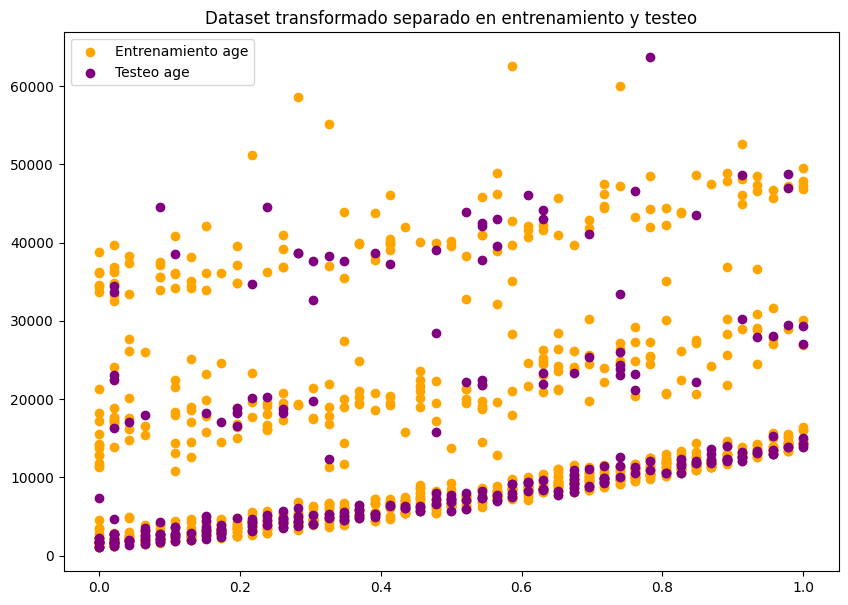

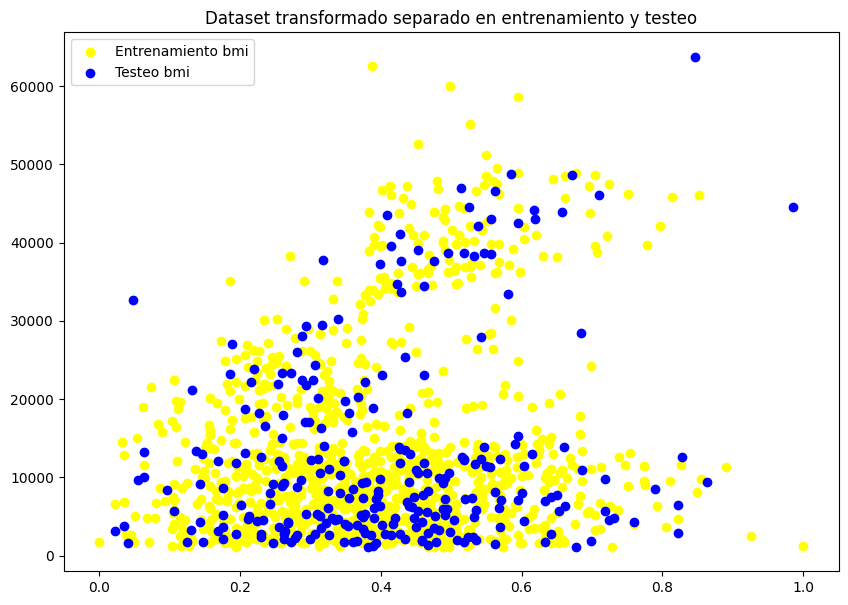

In [246]:
# Vemos gráficamente como queda el dataset transformador separado en entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0],ytrain,c='orange',label='Entrenamiento age')
plt.scatter(Xtest[:,0],ytest,c='purple',label='Testeo age')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo")
plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,1],ytrain,c='yellow',label='Entrenamiento bmi')
plt.scatter(Xtest[:,1],ytest,c='blue',label='Testeo bmi')
plt.legend()
plt.title("Dataset transformado separado en entrenamiento y testeo")

## Entrenamiento, prueba y resultados

In [247]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()

linear_regression_model_age = LinearRegression().fit(Xtrain[:,0].reshape(-1,1), ytrain)
linear_regression_model_bmi = LinearRegression().fit(Xtrain[:,1].reshape(-1,1), ytrain)
linear_regression_model_age_bmi = LinearRegression().fit(Xtrain, ytrain)

for model in [linear_regression_model_age, linear_regression_model_bmi]:
    print(f"y = {model.coef_[0]}*X0 + {model.intercept_}")

print(f"y = {linear_regression_model_age_bmi.coef_[0]}*X0 + {linear_regression_model_age_bmi.coef_[1]}*X1 + {linear_regression_model_age_bmi.intercept_}")

y = 11067.44175028364*X0 + 8207.666760389642
y = 14586.866346794437*X0 + 7616.360317155947
y = 10294.640447334945*X0 + 12295.631144406827*X1 + 3736.734197206113


In [248]:
#Calculamos predicciones para el conjunto de testeo
y_predic_model_age = linear_regression_model_age.predict(Xtest[:,0].reshape(-1,1))
y_predic_model_bmi = linear_regression_model_bmi.predict(Xtest[:,1].reshape(-1,1))
y_predic_model_age_bmi = linear_regression_model_age_bmi.predict(Xtest)

In [249]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_predic_models = [y_predic_model_age, y_predic_model_bmi, y_predic_model_age_bmi]
models = [linear_regression_model_age, linear_regression_model_bmi, linear_regression_model_age_bmi]
models_names = ['Age', 'BMI', 'Age y BMI']

for counter, model in enumerate(models):
    r2 = r2_score(ytest, y_predic_models[counter])
    mae = mean_absolute_error(ytest, y_predic_models[counter])
    mse = mean_squared_error(ytest, y_predic_models[counter])
    
    print(f"Modelo {counter+1}: {models_names[counter]}")
    print(f"Coeficiente de determinación (R2): {r2}")
    print(f"Error absoluto medio (MAE): {mae}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print()

Modelo 1: Age
Coeficiente de determinación (R2): 0.12408973539501966
Error absoluto medio (MAE): 9173.258196746589
Error cuadrático medio (MSE): 135983957.48054686

Modelo 2: BMI
Coeficiente de determinación (R2): 0.03970193117941878
Error absoluto medio (MAE): 9784.652596271331
Error cuadrático medio (MSE): 149085057.03839505

Modelo 3: Age y BMI
Coeficiente de determinación (R2): 0.1533569292467798
Error absoluto medio (MAE): 9222.664535238671
Error cuadrático medio (MSE): 131440262.76073726



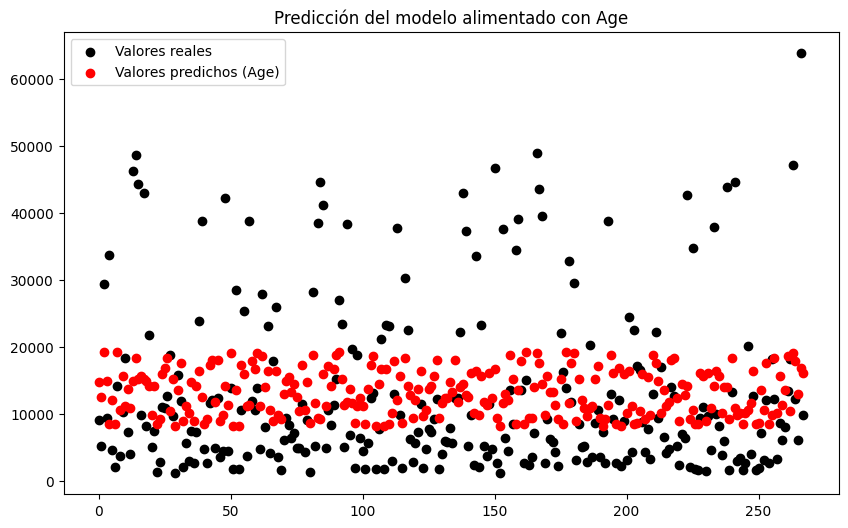

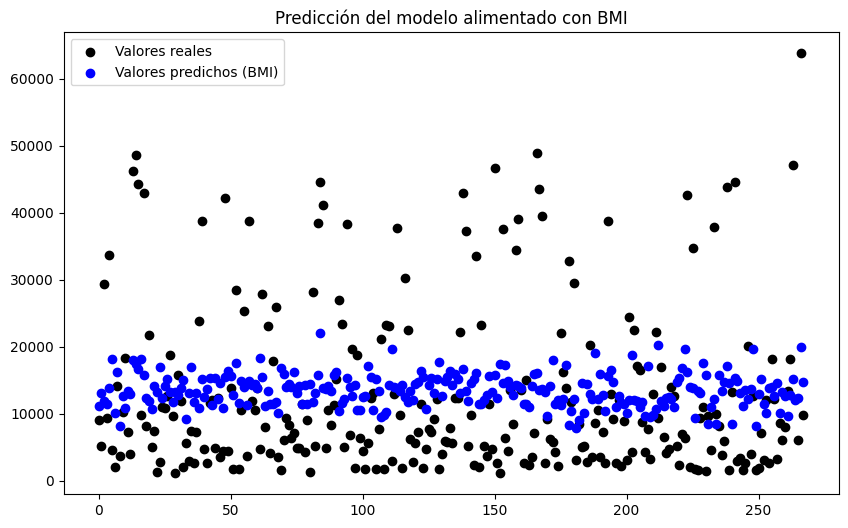

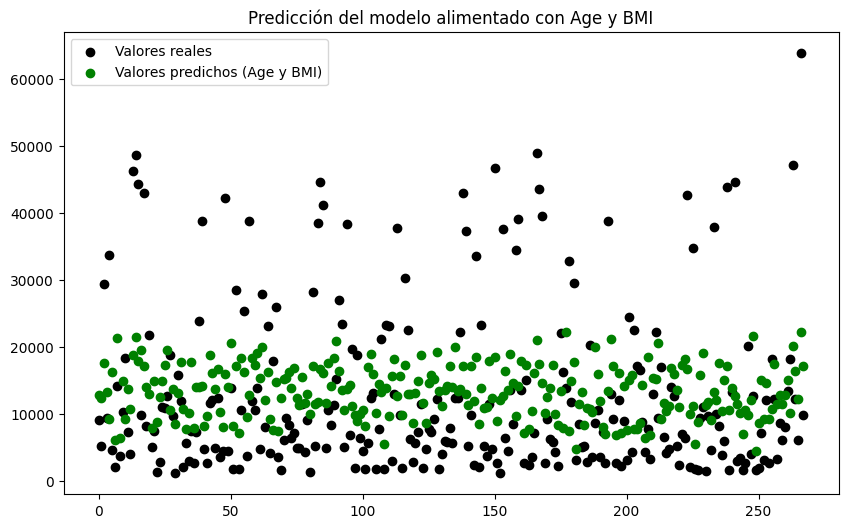

In [250]:
legend = ['Age', 'BMI', 'Age y BMI']
for counter, model_pred in enumerate(y_predic_models):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(ytest)), ytest, color='black', label='Valores reales')
    plt.scatter(range(len(ytest)), model_pred, color=colors[counter], label=f'Valores predichos ({models_names[counter]})')
    plt.title('Predicción del modelo alimentado con '+legend[counter])
    plt.legend()
    plt.show()

## Conclusión:

Como podemos observar en base a las metricas y los graficos generados, ninguno de los tres modelos predice de forma confiable los datos de prueba. Por lo que se puede ver, no logra capturar la dispersión de los datos reales, en especial los datos apartados.

# Regresión con SVR

Para la regresion con SVR voy a utilizar las dos variables tratadas anteriormente, "age" y "bmi".

In [251]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

best_model = grid_search.best_estimator_
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")

Mejores Hiperparámetros: {'C': 100, 'gamma': 'auto', 'kernel': 'poly'}


In [252]:
param_grid = {
    'kernel': ['poly'],
    'C': [60, 80, 90],
    'gamma': ['auto']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

best_model = grid_search.best_estimator_
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")

Mejores Hiperparámetros: {'C': 90, 'gamma': 'auto', 'kernel': 'poly'}


In [253]:
svr = SVR(C=90, gamma='auto', kernel='poly').fit(Xtrain, ytrain)

y_pred = svr.predict(Xtest)

y_train_pred = svr.predict(Xtrain)

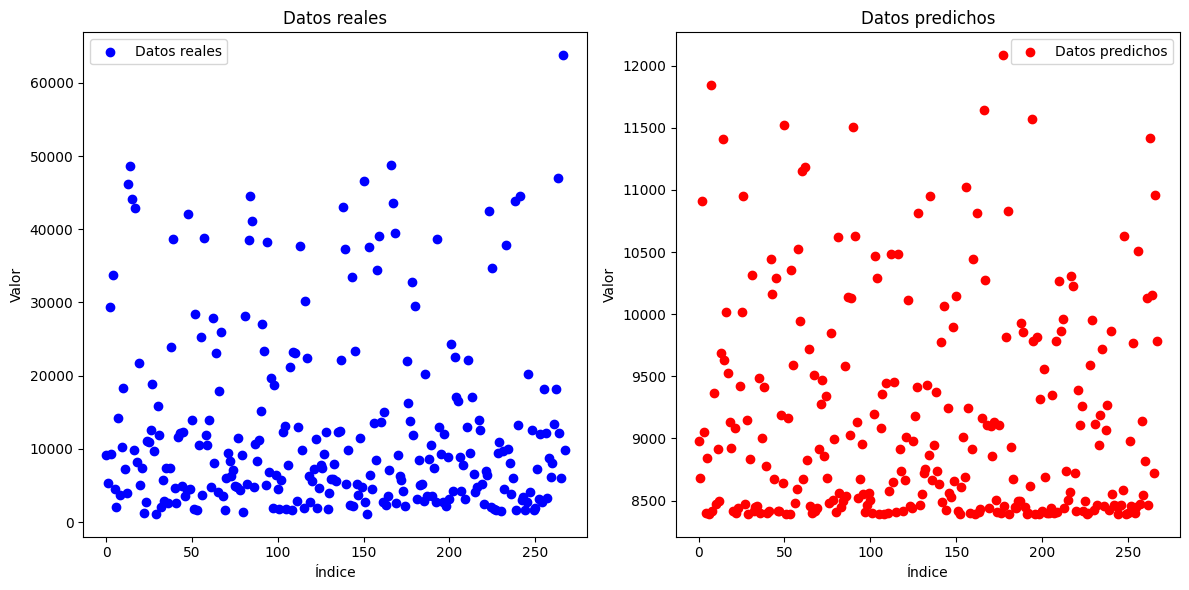

In [254]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales
plt.subplot(1, 2, 1)
plt.scatter(range(len(ytest)), ytest, color='blue', label='Datos reales')
plt.title('Datos reales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico de dispersión de los datos predichos
plt.subplot(1, 2, 2)
plt.scatter(range(len(ytest)), y_pred, color='red', label='Datos predichos')
plt.title('Datos predichos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

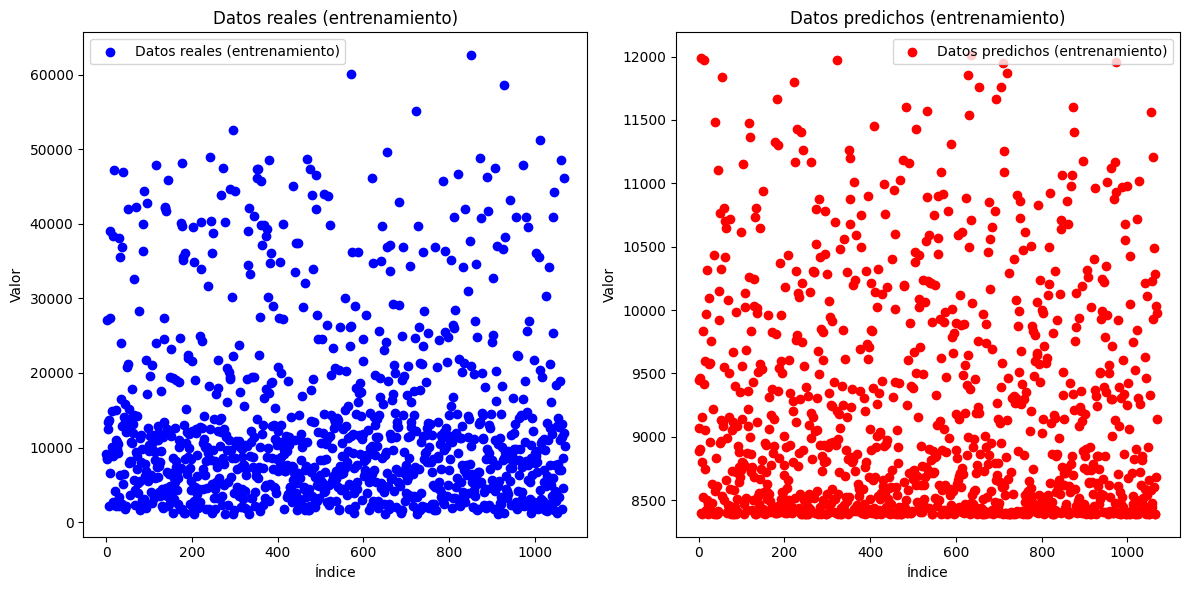

In [255]:
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales (entrenamiento)
plt.subplot(1, 2, 1)
plt.scatter(range(len(ytrain)), ytrain, color='blue', label='Datos reales (entrenamiento)')
plt.title('Datos reales (entrenamiento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico de dispersión de los datos predichos (entrenamiento)
plt.subplot(1, 2, 2)
plt.scatter(range(len(ytrain)), y_train_pred, color='red', label='Datos predichos (entrenamiento)')
plt.title('Datos predichos (entrenamiento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

In [256]:
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)

print(f"Metricas del modelo SVR contra el conjunto de testeo")
print(f"Coeficiente de determinación (R2): {r2}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}\n\n")

r2 = r2_score(ytrain, y_train_pred)
mae = mean_absolute_error(ytrain, y_train_pred)
mse = mean_squared_error(ytrain, y_train_pred)

print(f"Metricas del modelo SVR contra el conjunto de entrenamiento")
print(f"Coeficiente de determinación (R2): {r2}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")



Metricas del modelo SVR contra el conjunto de testeo
Coeficiente de determinación (R2): -0.04926068073078316
Error absoluto medio (MAE): 8120.181662742582
Error cuadrático medio (MSE): 162896389.68764883


Metricas del modelo SVR contra el conjunto de entrenamiento
Coeficiente de determinación (R2): -0.08248565156925403
Error absoluto medio (MAE): 7832.2637454362
Error cuadrático medio (MSE): 156239074.78165385


## Conclusión:

Las métricas del modelo SRV generado, indican una predicción pobre de los datos. El R2 negativo indica que el modelo es peor que simplemente usar la media de los valores reales. Igualmente el MAE es menor que el obtenido con el modelo de regresión lineal.

# Regresión con Decision Tree

In [257]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

best_model = grid_search.best_estimator_
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")



Mejores Hiperparámetros: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20}


In [258]:
y_pred_DT = best_model.predict(Xtest)

y_train_pred = best_model.predict(Xtrain)

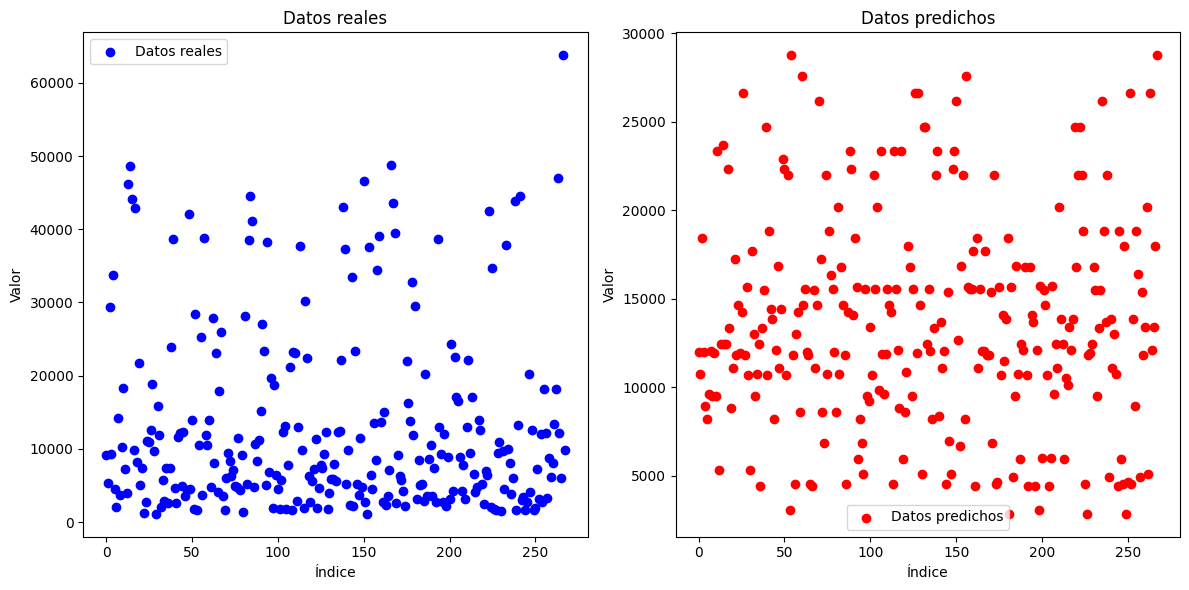

In [259]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales
plt.subplot(1, 2, 1)
plt.scatter(range(len(ytest)), ytest, color='blue', label='Datos reales')
plt.title('Datos reales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico de dispersión de los datos predichos
plt.subplot(1, 2, 2)
plt.scatter(range(len(ytest)), y_pred_DT, color='red', label='Datos predichos')
plt.title('Datos predichos')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

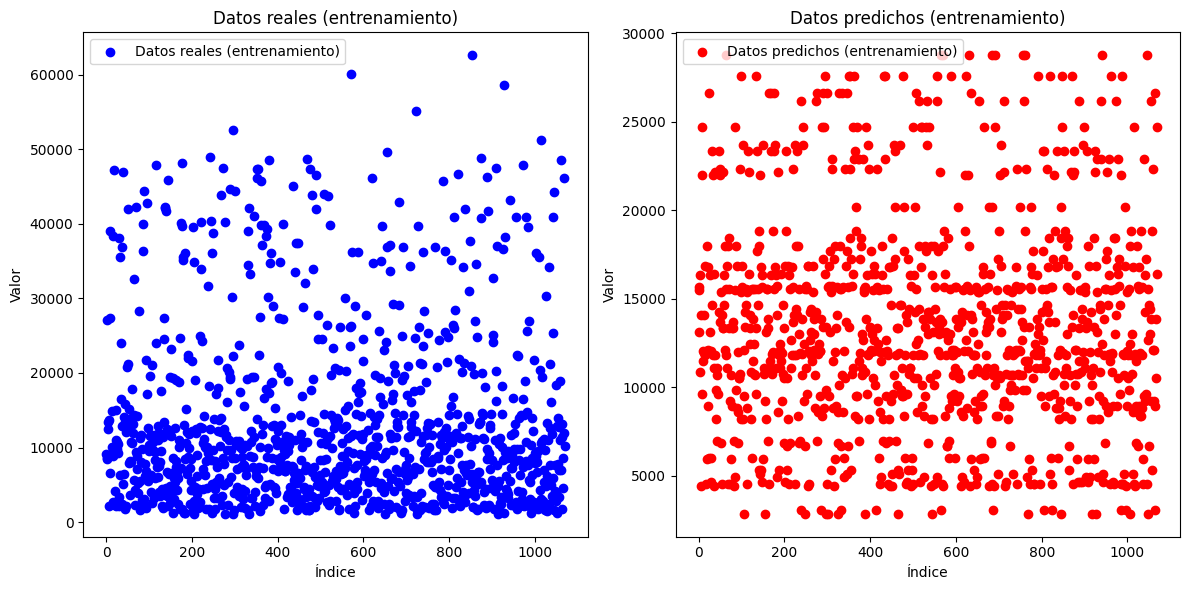

In [260]:
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de los datos reales (entrenamiento)
plt.subplot(1, 2, 1)
plt.scatter(range(len(ytrain)), ytrain, color='blue', label='Datos reales (entrenamiento)')
plt.title('Datos reales (entrenamiento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

# Gráfico de dispersión de los datos predichos (entrenamiento)
plt.subplot(1, 2, 2)
plt.scatter(range(len(ytrain)), y_train_pred, color='red', label='Datos predichos (entrenamiento)')
plt.title('Datos predichos (entrenamiento)')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()

plt.tight_layout()
plt.show()

In [261]:
r2 = r2_score(ytest, y_pred_DT)
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)

print(f"Metricas del modelo SVR contra el conjunto de testeo")
print(f"Coeficiente de determinación (R2): {r2}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}\n\n")

r2 = r2_score(ytrain, y_train_pred)
mae = mean_absolute_error(ytrain, y_train_pred)
mse = mean_squared_error(ytrain, y_train_pred)

print(f"Metricas del modelo SVR contra el conjunto de entrenamiento")
print(f"Coeficiente de determinación (R2): {r2}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")

Metricas del modelo SVR contra el conjunto de testeo
Coeficiente de determinación (R2): -0.009503526620400438
Error absoluto medio (MAE): 8120.181662742582
Error cuadrático medio (MSE): 162896389.68764883


Metricas del modelo SVR contra el conjunto de entrenamiento
Coeficiente de determinación (R2): 0.24995753968912993
Error absoluto medio (MAE): 7756.419263372628
Error cuadrático medio (MSE): 108256344.90031713


## Conclusión:

El resultado de la regresión con DT obtuvo peores métricas que los métodos anteriores. Por lo que se puede ver en los gráficos, los valores apartados afectan mucho más al DT que a los métodos anteriores.

# Conclusión Final

#### Comparativa de la predicción de todos los modelos desarrollados:

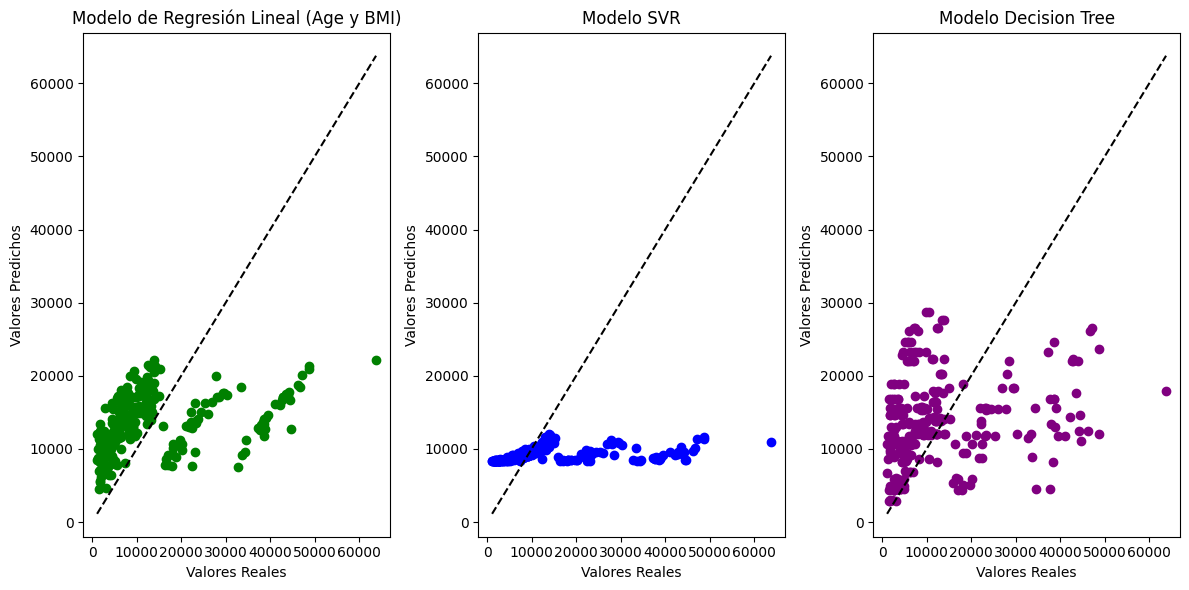

In [262]:
plt.figure(figsize=(12, 6))

# Scatterplot del modelo de regresión lineal basado en 'age' y 'bmi'
plt.subplot(1, 3, 1)
plt.scatter(ytest, y_predic_model_age_bmi, color='green')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='black', linestyle='--')
plt.title('Modelo de Regresión Lineal (Age y BMI)')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Scatterplot del modelo SVR
plt.subplot(1, 3, 2)
plt.scatter(ytest, y_pred, color='blue')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='black', linestyle='--')
plt.title('Modelo SVR')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

# Scatterplot del modelo Decision Tree
plt.subplot(1, 3, 3)
plt.scatter(ytest, y_pred_DT, color='purple')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='black', linestyle='--')
plt.title('Modelo Decision Tree')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')

plt.tight_layout()
plt.show()

En conclusión los modelos desarrollados no logran predecir de manera confiable los datos reales, se puede deber a la gran dispersión y variabilidad de los datos reales de la variable "charges". Además hay que tener en cuenta la baja correlación entre las variables numéricas disponibles y la variable a describir, como se pudo ver en el análisis exploratorio de los datos.